In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.9.0'

In [3]:
train_data_path = "train"
validation_data_path = "val"

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [7]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


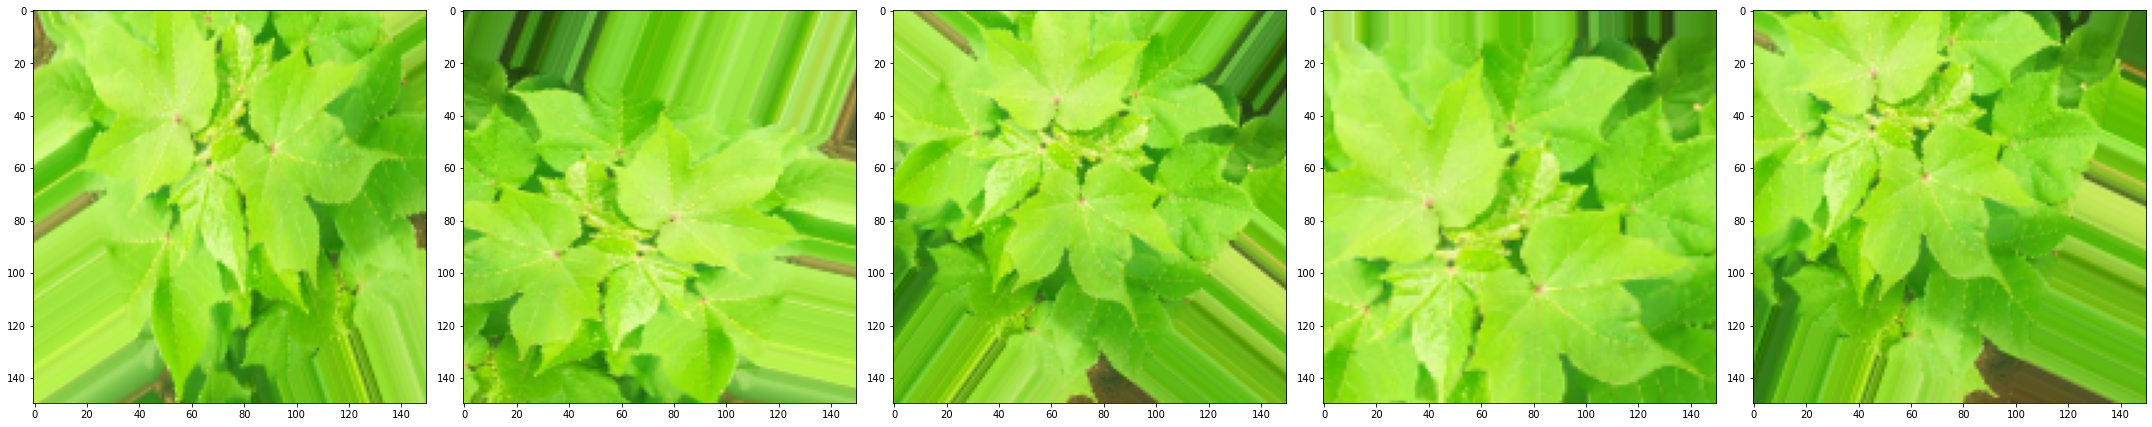

In [9]:
images = [training_data[0][0][0] for i in range(10)]
plotImages(images)

In [10]:
model_path = 'model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 

In [12]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2153 - accuracy: 0.4593
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to model\model.h5
61/61 [==============================] - 78s 1s/step - loss: 1.2153 - accuracy: 0.4593 - val_loss: 1.1454 - val_accuracy: 0.4167
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.0370 - accuracy: 0.5525
Epoch 2: val_accuracy improved from 0.41667 to 0.63272, saving model to model\model.h5
61/61 [==============================] - 77s 1s/step - loss: 1.0370 - accuracy: 0.5525 - val_loss: 0.8897 - val_accuracy: 0.6327
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.9354 - accuracy: 0.6181
Epoch 3: val_accuracy did not improve from 0.63272
61/61 [==============================] - 75s 1s/step - loss: 0.9354 - accuracy: 0.6181 - val_loss: 0.8687 - val_accuracy: 0.6265
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 0.9005 - accuracy: 0.6356
Epoch 4: va

61/61 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8365
Epoch 29: val_accuracy improved from 0.86728 to 0.89198, saving model to model\model.h5
61/61 [==============================] - 90s 1s/step - loss: 0.4128 - accuracy: 0.8365 - val_loss: 0.2870 - val_accuracy: 0.8920
Epoch 30/100
61/61 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8621
Epoch 30: val_accuracy improved from 0.89198 to 0.90123, saving model to model\model.h5
61/61 [==============================] - 83s 1s/step - loss: 0.3744 - accuracy: 0.8621 - val_loss: 0.2919 - val_accuracy: 0.9012
Epoch 31/100
61/61 [==============================] - ETA: 0s - loss: 0.3798 - accuracy: 0.8555
Epoch 31: val_accuracy did not improve from 0.90123
61/61 [==============================] - 89s 1s/step - loss: 0.3798 - accuracy: 0.8555 - val_loss: 0.4313 - val_accuracy: 0.8488
Epoch 32/100
61/61 [==============================] - ETA: 0s - loss: 0.3873 - accuracy: 0.8565
Epoch 32: val_

Epoch 58/100
61/61 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.8795
Epoch 58: val_accuracy improved from 0.94136 to 0.96296, saving model to model\model.h5
61/61 [==============================] - 92s 2s/step - loss: 0.3116 - accuracy: 0.8795 - val_loss: 0.1600 - val_accuracy: 0.9630
Epoch 59/100
61/61 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.8985
Epoch 59: val_accuracy did not improve from 0.96296
61/61 [==============================] - 84s 1s/step - loss: 0.2689 - accuracy: 0.8985 - val_loss: 0.2049 - val_accuracy: 0.9259
Epoch 60/100
61/61 [==============================] - ETA: 0s - loss: 0.2702 - accuracy: 0.8924
Epoch 60: val_accuracy did not improve from 0.96296
61/61 [==============================] - 80s 1s/step - loss: 0.2702 - accuracy: 0.8924 - val_loss: 0.2046 - val_accuracy: 0.9290
Epoch 61/100
61/61 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.8913
Epoch 61: val_accuracy did not improv

61/61 [==============================] - 92s 2s/step - loss: 0.2486 - accuracy: 0.9129 - val_loss: 0.1263 - val_accuracy: 0.9599
Epoch 88/100
61/61 [==============================] - ETA: 0s - loss: 0.2513 - accuracy: 0.9067
Epoch 88: val_accuracy did not improve from 0.96296
61/61 [==============================] - 90s 1s/step - loss: 0.2513 - accuracy: 0.9067 - val_loss: 0.2133 - val_accuracy: 0.9074
Epoch 89/100
61/61 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9098
Epoch 89: val_accuracy did not improve from 0.96296
61/61 [==============================] - 84s 1s/step - loss: 0.2436 - accuracy: 0.9098 - val_loss: 0.1722 - val_accuracy: 0.9475
Epoch 90/100
61/61 [==============================] - ETA: 0s - loss: 0.2319 - accuracy: 0.9083
Epoch 90: val_accuracy did not improve from 0.96296
61/61 [==============================] - 80s 1s/step - loss: 0.2319 - accuracy: 0.9083 - val_loss: 0.1581 - val_accuracy: 0.9383
Epoch 91/100
61/61 [====================

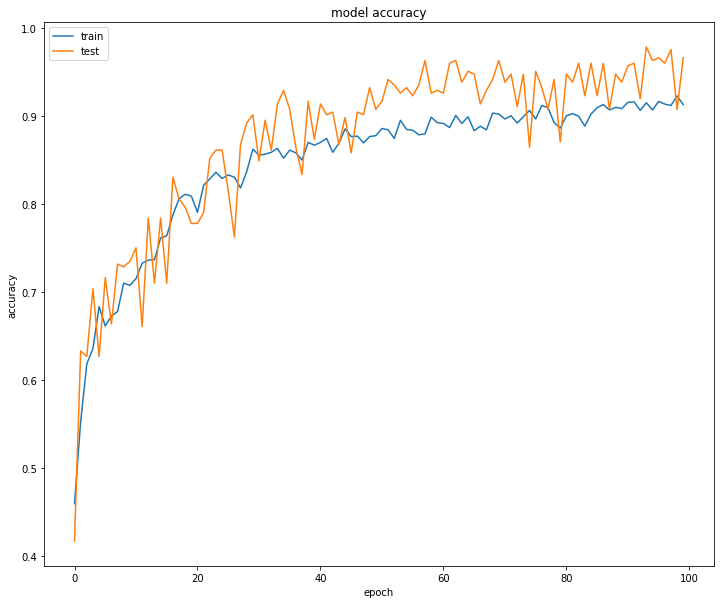

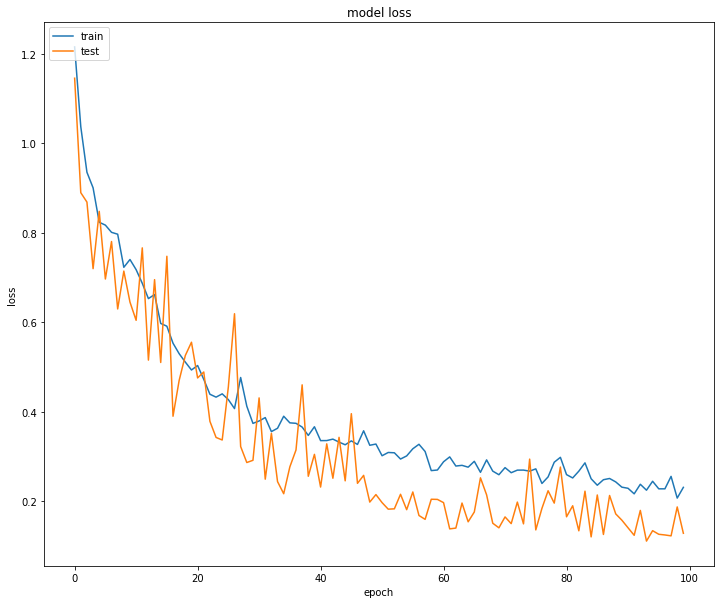

{'loss': [1.2152869701385498,
  1.0369668006896973,
  0.9353632926940918,
  0.9005312323570251,
  0.823639452457428,
  0.8172128796577454,
  0.801105260848999,
  0.7969301342964172,
  0.7230201363563538,
  0.7404299378395081,
  0.717761218547821,
  0.687315046787262,
  0.6531224250793457,
  0.6621696352958679,
  0.5975730419158936,
  0.5914565920829773,
  0.5534675717353821,
  0.5300086736679077,
  0.5112996101379395,
  0.49364858865737915,
  0.50361567735672,
  0.47276031970977783,
  0.43947094678878784,
  0.4330103397369385,
  0.44034343957901,
  0.4274566173553467,
  0.4074564576148987,
  0.4768757224082947,
  0.41277453303337097,
  0.3743751347064972,
  0.3797639310359955,
  0.38733258843421936,
  0.3559860587120056,
  0.36350634694099426,
  0.39037400484085083,
  0.375590980052948,
  0.37454065680503845,
  0.3661714494228363,
  0.3474881649017334,
  0.3668891489505768,
  0.33587607741355896,
  0.33599090576171875,
  0.33922842144966125,
  0.3325658440589905,
  0.3266165554523468,


In [15]:
 # summarize history for accuracy
plt.figure(figsize=(12,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
import numpy as np

In [17]:
from tensorflow.keras.preprocessing import image

In [18]:
test_image = image.load_img('test/d.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

In [19]:
result = cnn_model.predict(test_image)

1/1 [==============================] - 0s 317ms/step


In [20]:
pred = np.argmax(result)
print(pred)
if pred == 0:
    print('Predicted>>> healthy')
else:
    print('Predicted>>>diesease')

0
Predicted>>> healthy
